**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl
import os
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

## How can we set somthing in (errors is None)?

Text(0, 0.5, 'endgenous')

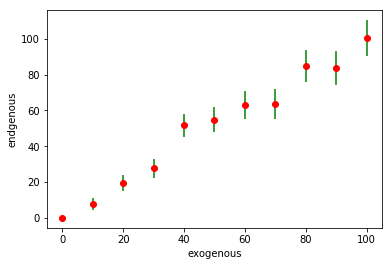

In [3]:
random.seed(0)
x=arange(0,110,10)
a=1

y = line(a,x,b=0) + np.random.randn(len(x)) * errors(x)
plt.errorbar(x,y,yerr=errors(x),fmt='ro',ecolor='g')
plt.xlabel('exogenous')
plt.ylabel('endgenous')


# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [4]:
print(x)
print(y)

[  0  10  20  30  40  50  60  70  80  90 100]
[  0.           7.80358357  19.33081399  27.61656584  51.69577075
  54.75384182  63.15618581  63.55841997  84.82319139  83.60271868
 100.31830558]


In [5]:
x1 = sm.add_constant(x)
x1

array([[  1.,   0.],
       [  1.,  10.],
       [  1.,  20.],
       [  1.,  30.],
       [  1.,  40.],
       [  1.,  50.],
       [  1.,  60.],
       [  1.,  70.],
       [  1.,  80.],
       [  1.,  90.],
       [  1., 100.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [6]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/nfshome/ku373/.conda/envs/myenv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1362.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           5.07e-12
Time:                        20:27:50   Log-Likelihood:                -33.514
No. Observations:                  11   AIC:                             69.03
Df Residuals:                      10   BIC:                             69.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0047      0.027     36.909      0.000       0.944       1.065
==============================================================================
Omnibus:                        1.450   Durbin-Watson:                   2.275
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                0.509
Skew:                           0.525   Prob(JB):                        0.775
Kurtosis:                       2.922   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#THE RIGHT WAY
smfit = smf.OLS(y, x1).fit()
smfit.summary()


/nfshome/ku373/.conda/envs/myenv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     343.9
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.77e-08
Time:                        20:27:50   Log-Likelihood:                -33.409
No. Observations:                  11   AIC:                             70.82
Df Residuals:                       9   BIC:                             71.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3050      3.146      0.415      0.688      -5.811       8.421
x1             0.9860      0.053     18.544      0.000       0.866       1.106
==============================================================================
Omnibus:                        1.406   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.699
Skew:                           0.599   Prob(JB):                        0.705
Kurtosis:                       2.705   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Difference: Without a constant, coefficients would try to account for all the Y values. However, in many of the real cases, Y is not 0 when X is 0, which means the model need constant. In these cases, coefficients can be higher than actual values. R2 can be distorted as well. 
## However, this case assumes there is no intercept when we create the line. Hence, I believe we should not use add_constant here.


# 4. plot the data (as points) and both statsmodels fits

In [8]:
c, d = smfit.params

Text(0.5, 1.0, 'OLS without constant')

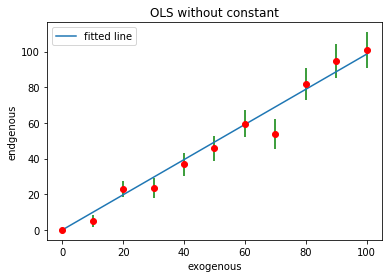

In [9]:
y = line(a,x,b=0) + np.random.randn(len(x)) * errors(x)
plt.errorbar(x,y,yerr=errors(x),fmt='ro',ecolor='g')
plt.xlabel('exogenous')
plt.ylabel('endgenous')
plt.plot(x, d*x, label="fitted line")
plt.legend(loc='upper left')
plt.title('OLS without constant')

### Figure1: OLS graph without constant. 

Text(0.5, 1.0, 'OLS with constant')

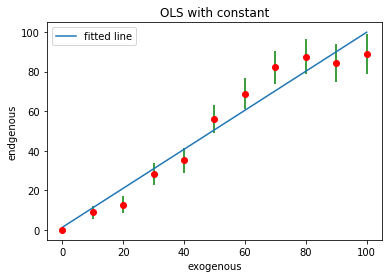

In [10]:
y = line(a,x,b=0) + np.random.randn(len(x)) * errors(x)
plt.errorbar(x,y,yerr=errors(x),fmt='ro',ecolor='g')
plt.xlabel('exogenous')
plt.ylabel('endgenous')
plt.plot(x, d*x+c, label="fitted line")
plt.legend(loc='upper left')
plt.title('OLS with constant')

### Figure2: OLS graph with constant. 

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5, 1.0, 'OLS with constant')

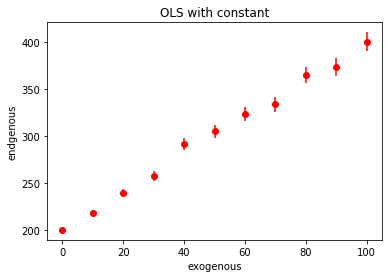

In [11]:
random.seed(0)
a = 2
intercept = 2*100
x=arange(0,110,10)

y=line(a,x,b=intercept) + np.random.randn(len(x)) * errors(x)
plt.errorbar(x,y,yerr=errors(x),fmt='ro',ecolor='r')
plt.xlabel('exogenous')
plt.ylabel('endgenous')
plt.title('OLS with constant')

# 6. repeat step 3

In [12]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/nfshome/ku373/.conda/envs/myenv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     71.30
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           7.32e-06
Time:                        20:27:51   Log-Likelihood:                -67.083
No. Observations:                  11   AIC:                             136.2
Df Residuals:                      10   BIC:                             136.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.8618      0.576      8.444      0.000       3.579       6.145
==============================================================================
Omnibus:                        1.251   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                0.710
Skew:                          -0.055   Prob(JB):                        0.701
Kurtosis:                       1.760   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#THE RIGHT WAY
x1 = sm.add_constant(x)
x1
smfit = smf.OLS(y, x1).fit()
smfit.summary()

/nfshome/ku373/.conda/envs/myenv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1395.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           3.51e-11
Time:                        20:27:51   Log-Likelihood:                -33.409
No. Observations:                  11   AIC:                             70.82
Df Residuals:                       9   BIC:                             71.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.3050      3.146     63.993      0.000     194.189     208.421
x1             1.9860      0.053     37.350      0.000       1.866       2.106
==============================================================================
Omnibus:                        1.406   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.699
Skew:                           0.599   Prob(JB):                        0.705
Kurtosis:                       2.705   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Difference: This time, the difference is obvious. Without a constant, coefficients would try to account for all the Y values. Therefore, the coefficient is largher than actual setting (in this case slope should be 2). 
## The model wIth a constant has quite similar coefficient and constant with our intention (point setting), resulting high R2.
## In conclusion, we should set constant here. 

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [22]:
w = 1. / (np.std(errors(x))**2)
x1 = sm.add_constant(x)
x1
mod_wls = sm.WLS(y, x1, weights=w)
res_wls = mod_wls.fit()
res_wls.summary()



/nfshome/ku373/.conda/envs/myenv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            WLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1395.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           3.51e-11
Time:                        22:34:28   Log-Likelihood:                -33.409
No. Observations:                  11   AIC:                             70.82
Df Residuals:                       9   BIC:                             71.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.3050      3.146     63.993      0.000     194.189     208.421
x1             1.9860      0.053     37.350      0.000       1.866       2.106
==============================================================================
Omnibus:                        1.406   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.699
Skew:                           0.599   Prob(JB):                        0.705
Kurtosis:                       2.705   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)